In [18]:
# plotly
# %pip install plotly
# %pip install nbformat

In [19]:
from flowtracks.io import trajectories_ptvis
inName = '../res/ptv_is.%d'
trajects = trajectories_ptvis(inName, traj_min_len=7)

In [20]:
trajects[0].pos(), trajects[0].velocity(), trajects[0].accel()

(array([[0.962856, 0.279922, 0.899497],
        [1.000715, 0.247012, 0.855449],
        [1.022504, 0.252486, 0.840954],
        [1.027327, 0.25776 , 0.846796],
        [1.039974, 0.269725, 0.857541],
        [1.017681, 0.26357 , 0.91879 ],
        [0.99445 , 0.250805, 0.976952]]),
 array([[ 0.037859, -0.03291 , -0.044048],
        [ 0.021789,  0.005474, -0.014495],
        [ 0.004823,  0.005274,  0.005842],
        [ 0.012647,  0.011965,  0.010745],
        [-0.022293, -0.006155,  0.061249],
        [-0.023231, -0.012765,  0.058162],
        [ 0.      ,  0.      ,  0.      ]]),
 array([[-0.01607 ,  0.038384,  0.029553],
        [-0.016966, -0.0002  ,  0.020337],
        [ 0.007824,  0.006691,  0.004903],
        [-0.03494 , -0.01812 ,  0.050504],
        [-0.000938, -0.00661 , -0.003087],
        [ 0.      ,  0.      ,  0.      ],
        [ 0.      ,  0.      ,  0.      ]]))

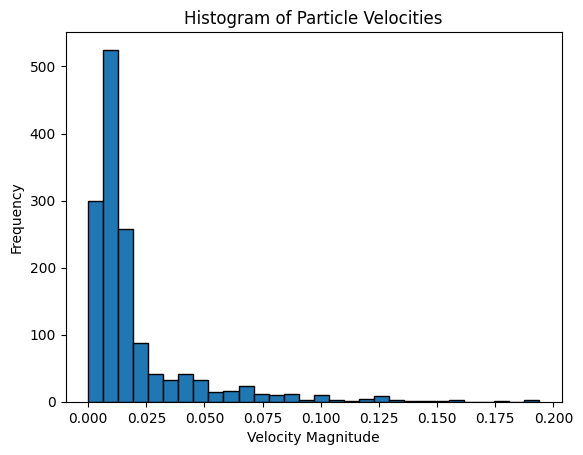

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Extract velocities from trajects
velocities = []
for tr in trajects:
    velocities.extend(tr.velocity())

# Convert to numpy array for easier manipulation
velocities = np.array(velocities)

# Calculate the magnitude of velocities
velocity_magnitudes = np.linalg.norm(velocities, axis=1)

# Plot histogram
plt.hist(velocity_magnitudes, bins=30, edgecolor='black')
plt.xlabel('Velocity Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Particle Velocities')
plt.show()

In [22]:
len(trajects)

170

In [23]:
import pandas as pd
tmp = []
for tr in trajects:
    tmp.append(pd.DataFrame({'id':tr.trajid(),'x':tr.pos()[:,0],'y':tr.pos()[:,1],'z':tr.pos()[:,2]}))
    
    
df = pd.concat(tmp)

In [24]:
import plotly.express as px
# df = px.data.gapminder().query("continent=='Europe'")
fig = px.line_3d(df, x="x", y="y", z="z", color='id')
fig.show()

In [ ]:
import plotly.graph_objects as go

# fig = go.Figure()

# for traj_id in df['id'].unique():
#     traj_data = df[df['id'] == traj_id]
#     fig.add_trace(go.Scatter3d(
#         x=traj_data['x'],
#         y=traj_data['y'],
#         z=traj_data['z'],
#         mode='lines+markers',
#         marker=dict(size=2),
#         name=str(traj_id)
#     ))

# fig.update_layout(
#     scene=dict(
#         xaxis_title='x',
#         yaxis_title='y',
#         zaxis_title='z'
#     ),
#     title='3D Trajectories with Lines and Small Symbols'
# )

# fig.show()

In [25]:
import plotly.graph_objects as go
fig = go.Figure()

for traj_id in df['id'].unique():
    traj_data = df[df['id'] == traj_id]
    traj_velocities = velocities[df['id'] == traj_id]
    velocity_magnitudes = np.linalg.norm(traj_velocities, axis=1)
    
    fig.add_trace(go.Scatter3d(
        x=traj_data['x'],
        y=traj_data['y'],
        z=traj_data['z'],
        mode='lines+markers',
        marker=dict(size=2, color=velocity_magnitudes, colorscale='Viridis', colorbar=dict(title='Velocity Magnitude')),
        name=str(traj_id)
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    ),
    title='3D Trajectories with Color Proportional to Velocity Magnitude'
)

fig.show()